#  Préparation et nettoyage des données pour l'attractivités des communes

---





<!-- COMPLÉTEZ ICI: Nettoyer les données de délinquence par commune-->
<!-- Ce notebook a pour objectif de préparer les données de délinquence par commune -->

### Sources de données utilisées

<!-- - https://catalogue-donnees.insee.fr/fr/catalogue/recherche/DS_BPE-->


---

## Import des bibliothèques


In [1]:
# Manipulation de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Utilitaires
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# CODEZ ICI: Imports supplémentaires si nécessaire

---

## Chargement des données brutes

### Chargement du fichier BPE

In [2]:
def load_data():
    bpe = pd.read_csv("data/DS_BPE_2024_CSV_FR/DS_BPE_2024_data.csv", sep=';', low_memory=False)
    insee = pd.read_csv("data/v_commune_depuis_1943.csv", sep=',')
    metadata = pd.read_csv("data/DS_BPE_2024_CSV_FR/DS_BPE_2024_metadata.csv", sep=';', low_memory=False)
    return bpe,insee,metadata

bpe,insee,metadata= load_data()

In [3]:

def display_basic_info(bpe,dataset_name= "Dataset"):
    
    print(f"\nStructure du dataset : {dataset_name}")
    
    print("=== Dimensions du DataFrame ===")
    print(f"Nombre de lignes : {bpe.shape[0]}")
    print(f"Nombre de colonnes : {bpe.shape[1]}")
    
    print("=== Noms des colonnes ===:")
    print(bpe.columns.tolist())
    
    print("=== Types de colonnes ===")
    print(bpe.dtypes, "\n")
    
    print("=== Valeurs manquantes par colonne ===")
    print(bpe.isnull().sum(), "\n")
    
    print("=== Aperçu des premières lignes ===")
    print(bpe.head())
    
    


display_basic_info(bpe, "Attraction")


Structure du dataset : Attraction
=== Dimensions du DataFrame ===
Nombre de lignes : 2300480
Nombre de colonnes : 8
=== Noms des colonnes ===:
['GEO', 'GEO_OBJECT', 'FACILITY_DOM', 'FACILITY_SDOM', 'FACILITY_TYPE', 'BPE_MEASURE', 'TIME_PERIOD', 'OBS_VALUE']
=== Types de colonnes ===
GEO              object
GEO_OBJECT       object
FACILITY_DOM     object
FACILITY_SDOM    object
FACILITY_TYPE    object
BPE_MEASURE      object
TIME_PERIOD       int64
OBS_VALUE         int64
dtype: object 

=== Valeurs manquantes par colonne ===
GEO              0
GEO_OBJECT       0
FACILITY_DOM     0
FACILITY_SDOM    0
FACILITY_TYPE    0
BPE_MEASURE      0
TIME_PERIOD      0
OBS_VALUE        0
dtype: int64 

=== Aperçu des premières lignes ===
     GEO GEO_OBJECT FACILITY_DOM FACILITY_SDOM FACILITY_TYPE BPE_MEASURE  \
0  29305     UU2020            D            D1          D115  FACILITIES   
1  77205     UU2020            D            D2          D265  FACILITIES   
2  31113     UU2020            D     

### Analyse des colonnes

<!-- COMPLÉTEZ ICI: Décrivez les colonnes principales du dataset DVF -->
<!-- Exemple: -->
<!-- - date_mutation: date de la transaction -->
<!-- - valeur_fonciere: prix de vente -->
<!-- - type_local: appartement, maison, etc. -->
<!-- - surface_reelle_bati: surface en m² -->
<!-- - nombre_pieces_principales: nombre de pièces -->
<!-- - code_postal, commune -->

In [4]:
def analyze_columns(bpe, dataset_name="Dataset"):
   
    print(f"\n Analyse des colonnes pour : {dataset_name}")
    
    # Boucle sur chaque colonne
    for col in bpe.columns:
        print(f"\n Colonne : {col}")
        print(f"   ➜ Type : {bpe[col].dtype}")
        print(f"   ➜ Valeurs manquantes : {bpe[col].isna().sum()}")
        print(f"   ➜ Valeurs uniques : {bpe[col].nunique()}")
        
        # Affiche les 5 valeurs les plus fréquentes (hors valeurs manquantes)
        top_values = bpe[col].value_counts(dropna=True).head(5)
        print("   ➜ Valeurs les plus fréquentes :")
        for val, freq in top_values.items():
            print(f"       {val} → {freq} occurrences")
    

analyze_columns(bpe, " BPE")



 Analyse des colonnes pour :  BPE

 Colonne : GEO
   ➜ Type : object
   ➜ Valeurs manquantes : 0
   ➜ Valeurs uniques : 37936
   ➜ Valeurs les plus fréquentes :
       12202 → 599 occurrences
       34301 → 596 occurrences
       44109 → 584 occurrences
       64102 → 564 occurrences
       08105 → 561 occurrences

 Colonne : GEO_OBJECT
   ➜ Type : object
   ➜ Valeurs manquantes : 0
   ➜ Valeurs uniques : 11
   ➜ Valeurs les plus fréquentes :
       COM → 1288831 occurrences
       UU2020 → 275638 occurrences
       BV2022 → 246935 occurrences
       EPCI → 196771 occurrences
       AAV2020 → 115855 occurrences

 Colonne : FACILITY_DOM
   ➜ Type : object
   ➜ Valeurs manquantes : 0
   ➜ Valeurs uniques : 8
   ➜ Valeurs les plus fréquentes :
       A → 657757 occurrences
       D → 505190 occurrences
       F → 411123 occurrences
       B → 375200 occurrences
       C → 178231 occurrences

 Colonne : FACILITY_SDOM
   ➜ Type : object
   ➜ Valeurs manquantes : 0
   ➜ Valeurs uniques : 28

**Analyse des valeurs manquantes :**
<!-- COMPLÉTEZ ICI: Commentez les résultats -->
<!-- Quelles colonnes ont beaucoup de valeurs manquantes ? -->
<!-- Sont-elles critiques pour l'analyse ? -->

---

## Nettoyage des données

### Sélection des colonnes pertinentes

In [5]:
def select_relevant_columns_bpe(bpe):
    """
    Prépare les données BPE pour l'analyse d'attractivité des communes.
    Renomme les colonnes et garde uniquement celles utiles.
    """
    bpe = bpe.rename(columns={
        'GEO': 'code_commune',
        'FACILITY_DOM': 'domaine_equipement',
        'FACILITY_SDOM': 'sous_domaine_equipement',
        'FACILITY_TYPE': 'type_equipement',
        'OBS_VALUE': 'nombre_equipements',
        'TIME_PERIOD': 'annee_donnees'
    })[['code_commune', 'annee_donnees', 'domaine_equipement', 'sous_domaine_equipement', 
        'type_equipement', 'nombre_equipements']]

    print("Colonnes pertinentes sélectionnées avec succès")
    print(f"→ BPE: {list(bpe.columns)}")
    
    return bpe

# Exécution
bpe = select_relevant_columns_bpe(bpe)


Colonnes pertinentes sélectionnées avec succès
→ BPE: ['code_commune', 'annee_donnees', 'domaine_equipement', 'sous_domaine_equipement', 'type_equipement', 'nombre_equipements']


### Conversion des types de données

In [6]:
def convert_column_types_bpe(bpe):
    """
    Convertit les colonnes du DataFrame BPE vers des types adaptés.
    'annee_donnees' devient un entier.
    'nombre_equipements' devient numérique.
    """
    bpe = bpe.copy()
    
    # Colonnes texte
    bpe['code_commune'] = bpe['code_commune'].astype('string')
    bpe['domaine_equipement'] = bpe['domaine_equipement'].astype('string')
    bpe['sous_domaine_equipement'] = bpe['sous_domaine_equipement'].astype('string')
    bpe['type_equipement'] = bpe['type_equipement'].astype('string')
    
    # Colonnes numériques
    bpe['nombre_equipements'] = pd.to_numeric(bpe['nombre_equipements'], errors='coerce')
    bpe['annee_donnees'] = pd.to_numeric(bpe['annee_donnees'], errors='coerce').astype('Int64')
    
    print("Types de colonnes après conversion :")
    print(bpe.dtypes)
    
    return bpe

# Utilisation
bpe = convert_column_types_bpe(bpe)


Types de colonnes après conversion :
code_commune               string[python]
annee_donnees                       Int64
domaine_equipement         string[python]
sous_domaine_equipement    string[python]
type_equipement            string[python]
nombre_equipements                  int64
dtype: object


## Filtrer sur les données en IDF

In [7]:
def filter_idf_bpe(bpe):
    """
    Filtre les communes BPE d'Île-de-France et ajoute le nom des départements.
    """
    print("FILTRAGE DES COMMUNES BPE – ÎLE-DE-FRANCE")

    # Extraction du code département
    bpe['departement'] = bpe['code_commune'].astype(str).str[:2]

    # Départements IDF
    dept_idf = ['75', '77', '78', '91', '92', '93', '94', '95']
    bpe_idf = bpe[bpe['departement'].isin(dept_idf)].copy()

    # Dictionnaire de correspondance
    mapping_dept = {
        '75': 'Paris',
        '77': 'Seine-et-Marne',
        '78': 'Yvelines',
        '91': 'Essonne',
        '92': 'Hauts-de-Seine',
        '93': 'Seine-Saint-Denis',
        '94': 'Val-de-Marne',
        '95': "Val-d'Oise"
    }

    # Ajout du nom du département
    bpe_idf['nom_departement'] = bpe_idf['departement'].map(mapping_dept)

    # Résumé simple
    total_communes = bpe_idf['code_commune'].nunique()
    total_departements = bpe_idf['departement'].nunique()
    print(f"Communes IDF dans BPE : {total_communes}")
    print(f"Départements trouvés : {total_departements}\n")

    # Groupement par département (avec le nombre de communes)
    print("Communes par département (BPE) :")
    resume = bpe_idf.groupby('nom_departement')['code_commune'].nunique().reset_index()
    print(resume.to_string(index=False))

    return bpe_idf

# Utilisation
bpe_idf = filter_idf_bpe(bpe)


FILTRAGE DES COMMUNES BPE – ÎLE-DE-FRANCE
Communes IDF dans BPE : 1413
Départements trouvés : 8

Communes par département (BPE) :
  nom_departement  code_commune
          Essonne           212
   Hauts-de-Seine            40
            Paris            55
Seine-Saint-Denis            61
   Seine-et-Marne           515
       Val-d'Oise           196
     Val-de-Marne            58
         Yvelines           276


## Afficher les communes par département

In [8]:
def afficher_communes_bpe_par_departement(bpe_idf):
    """
    Affiche les communes BPE groupées par département pour l'Île-de-France.
    """
    # Boucle sur chaque département
    for dep in sorted(bpe_idf['nom_departement'].unique()):
        communes = sorted(bpe_idf[bpe_idf['nom_departement'] == dep]['code_commune'].unique())
        print(f"\nDépartement {dep} ({len(communes)} communes) :")
        for commune in communes:
            print(f"  - {commune}")

# Utilisation
afficher_communes_bpe_par_departement(bpe_idf)



Département Essonne (212 communes) :
  - 91
  - 91001
  - 91016
  - 91017
  - 91021
  - 91022
  - 91027
  - 91035
  - 91037
  - 91038
  - 91041
  - 91044
  - 91045
  - 91047
  - 91064
  - 91067
  - 91069
  - 91075
  - 91079
  - 91080
  - 91081
  - 91085
  - 91086
  - 91093
  - 91095
  - 91097
  - 91098
  - 91099
  - 911
  - 91100
  - 91101
  - 91102
  - 91103
  - 91104
  - 91105
  - 91106
  - 91107
  - 91108
  - 91109
  - 91111
  - 91112
  - 91114
  - 91115
  - 91121
  - 91122
  - 91129
  - 91130
  - 91131
  - 91132
  - 91135
  - 91136
  - 91137
  - 91145
  - 91148
  - 91156
  - 91159
  - 91161
  - 91174
  - 91175
  - 91179
  - 91180
  - 91184
  - 91186
  - 91191
  - 91195
  - 91198
  - 912
  - 91200
  - 91201
  - 91202
  - 91203
  - 91204
  - 91205
  - 91206
  - 91207
  - 91215
  - 91216
  - 91223
  - 91225
  - 91226
  - 91228
  - 91232
  - 91235
  - 91240
  - 91243
  - 91244
  - 91247
  - 91248
  - 91249
  - 91272
  - 91273
  - 91274
  - 91275
  - 91284
  - 91286
  - 91292
  - 91293

## Obtenir le nom des communes et supprimé les communes hors IDF

## Chargement de l'INSEE



In [9]:
def prepare_insee_data(insee):
    
    insee_clean = insee[['COM', 'LIBELLE']].copy()
    
    insee_clean = insee_clean.rename(columns={
        'COM': 'code_commune',
        'LIBELLE': 'nom_commune'
    })
    
    # Supprimer les doublons (garder la version la plus récente)
    avant = len(insee_clean)
    insee_clean = insee_clean.drop_duplicates(subset='code_commune', keep='last')
    apres = len(insee_clean)
    
    print(f" Lignes avant dédoublonnage : {avant:,}")
    print(f" Lignes après dédoublonnage : {apres:,}")
    print(f" Doublons supprimés : {avant - apres:,}")
    print(f" Communes uniques : {insee_clean['code_commune'].nunique():,}\n")
    
    print("Aperçu des données INSEE :")
    print(insee_clean.head(10))
    
    return insee_clean

insee = prepare_insee_data(insee)

 Lignes avant dédoublonnage : 42,314
 Lignes après dédoublonnage : 39,162
 Doublons supprimés : 3,152
 Communes uniques : 39,162

Aperçu des données INSEE :
   code_commune              nom_commune
0         01001  L'Abergement-Clémenciat
1         01002    L'Abergement-de-Varey
2         01003                 Amareins
4         01004        Ambérieu-en-Bugey
5         01005      Ambérieux-en-Dombes
6         01006                  Ambléon
7         01007                 Ambronay
8         01008                 Ambutrix
9         01009         Andert-et-Condon
10        01010                Anglefort


## Obtenir le nom des communes

In [10]:
def merge_commune_names_bpe(df_bpe, insee):
    print("\nFUSION DES NOMS DE COMMUNES - BPE")
    
    avant = len(df_bpe)
    df_merged = df_bpe.merge(insee, on='code_commune', how='left')
    apres = len(df_merged)
    
    sans_nom = df_merged['nom_commune'].isna().sum()
    
    print(f"Lignes avant fusion : {avant:,}")
    print(f"Lignes après fusion : {apres:,}")
    print(f"Communes sans nom trouvé : {sans_nom:,}")
    
    if sans_nom > 0:
        print("\nCodes communes BPE sans correspondance :")
        print(df_merged.loc[df_merged['nom_commune'].isna(), 'code_commune'].unique()[:10])
    
    correspondance_unique = df_merged[['code_commune', 'nom_commune']].drop_duplicates().sort_values('code_commune')
    print("\nListe complète des correspondances code → nom (BPE) :")
    print(correspondance_unique.to_string(index=False))
    
    return df_merged

# Appliquer sur le DataFrame BPE
bpe_idf = merge_commune_names_bpe(bpe_idf, insee)



FUSION DES NOMS DE COMMUNES - BPE
Lignes avant fusion : 127,526
Lignes après fusion : 127,526
Communes sans nom trouvé : 23,206

Codes communes BPE sans correspondance :
['91101' '95302' '91102' '95201' '91206' '91202' '91107' '95105' '91302'
 '91304']

Liste complète des correspondances code → nom (BPE) :
code_commune                  nom_commune
          75                          NaN
        7501                          NaN
        7502                          NaN
        7503                          NaN
        7504                          NaN
        7505                          NaN
       75056                        Paris
        7506                          NaN
        7507                          NaN
        7508                          NaN
        7509                          NaN
         751                          NaN
        7510                          NaN
       75101     Paris 1er Arrondissement
       75102      Paris 2e Arrondissement
       75103      P

## Suppression des ligne vide (ne correspond pas pour les données de l'IDF)

In [11]:
# Supprimer les lignes sans nom de commune
bpe_idf = bpe_idf[bpe_idf['nom_commune'].notna()].copy()

print(f"Lignes après suppression des communes non trouvées : {len(bpe_idf):,}")


Lignes après suppression des communes non trouvées : 104,320


## Nom de chaque commune dans les départements

In [12]:
# Groupement par département et communes uniques
departements = bpe_idf.groupby('nom_departement')['nom_commune'].unique()

for dep, communes in departements.items():
    print(f"\nDépartement {dep} :")
    for commune in communes:
        print(f" - {commune}")



Département Essonne :
 - Brétigny-sur-Orge
 - Breuillet
 - Breux-Jouy
 - Écharcon
 - Draveil
 - Limours
 - Angerville
 - Marolles-en-Hurepoix
 - Dourdan
 - Milly-la-Forêt
 - Ballancourt-sur-Essonne
 - Étampes
 - Arpajon
 - La Ferté-Alais
 - Étréchy
 - Boussy-Saint-Antoine
 - Boigneville
 - Boissy-le-Cutté
 - Bouray-sur-Juine
 - Boissy-la-Rivière
 - Corbreuse
 - Le Coudray-Montceaux
 - Étiolles
 - Athis-Mons
 - Avrainville
 - Ballainvilliers
 - Mennecy
 - Mespuits
 - Massy
 - Montgeron
 - Bruyères-le-Châtel
 - Brunoy
 - Longpont-sur-Orge
 - Longjumeau
 - Marcoussis
 - Égly
 - Épinay-sous-Sénart
 - Épinay-sur-Orge
 - Champlan
 - Chalo-Saint-Mars
 - Chevannes
 - Cerny
 - Chalou-Moulineux
 - Cheptainville
 - Chilly-Mazarin
 - Champcueil
 - Évry-Courcouronnes
 - Fleury-Mérogis
 - Bièvres
 - Grigny
 - Gif-sur-Yvette
 - D'Huison-Longueville
 - Crosne
 - Monnerville
 - Le Mérévillois
 - Les Molières
 - Dannemois
 - Corbeil-Essonnes
 - Courson-Monteloup
 - Courances
 - Nozay
 - La Norville
 - 

## Supprimer paris 75 qui regrouppe déjà les informations dans tous Paris

In [13]:
# Supprimer la commune agrégée Paris (75056)
bpe_idf = bpe_idf[bpe_idf['code_commune'] != '75056'].copy()

# Nombre de départements IDF restants
departements_idf = sorted(bpe_idf['departement'].unique())
print(f"Départements IDF restants : {departements_idf}")
print(f"Nombre de départements : {len(departements_idf)}")

# Nombre de communes IDF restantes
communes_idf = bpe_idf['code_commune'].unique()
print(f"Nombre total de communes IDF : {len(communes_idf)}")

Départements IDF restants : ['75', '77', '78', '91', '92', '93', '94', '95']
Nombre de départements : 8
Nombre total de communes IDF : 1299


## Filtrer sur l'année Max 

In [14]:
def filter_latest_year(bpe_idf):
    """
    Garde uniquement les données de l'année la plus récente
    """
    print("FILTRAGE DE L'ANNÉE LA PLUS RÉCENTE")

    annee_max = bpe_idf['annee_donnees'].max()
    df_latest = bpe_idf[bpe_idf['annee_donnees'] == annee_max].copy()

    print(f" Année sélectionnée : {annee_max}")
    print(f" Lignes conservées : {len(df_latest):,}")
    print(f" Communes uniques : {df_latest['code_commune'].nunique():,}")

    return df_latest  

# Appliquer sur le DataFrame BPE
bpe_df_latest = filter_latest_year(bpe_idf)


FILTRAGE DE L'ANNÉE LA PLUS RÉCENTE
 Année sélectionnée : 2024
 Lignes conservées : 103,810
 Communes uniques : 1,299


## Traitement des doublons

In [15]:
def remove_exact_duplicates(bpe):
    """
    Supprime les lignes exactement identiques
    """
    print(" SUPPRESSION DES DOUBLONS EXACTS")
    avant = len(bpe)
    
    bpe_clean = bpe.drop_duplicates()
    
    apres = len(bpe_clean)
    print(f"Lignes avant : {avant:,}")
    print(f" Lignes après : {apres:,}")
    print(f" Doublons supprimés : {avant - apres:,}")
    
    return bpe_clean

# Utilisation
bpe_clean = remove_exact_duplicates(bpe_df_latest)

 SUPPRESSION DES DOUBLONS EXACTS
Lignes avant : 103,810
 Lignes après : 101,349
 Doublons supprimés : 2,461


## Relier avec les metadata pour comprendre les équipements

 Filtrer les métadonnées pour FACILITY_DOM, FACILITY_SDOM et FACILITY_TYPE

In [16]:
def enrich_bpe_with_metadata(bpe_clean, metadata):
    """
    Fusionne le DataFrame BPE avec les métadonnées pour obtenir
    les libellés des domaines, sous-domaines et types d'équipements.
    """
    # Filtrer les métadonnées utiles
    metadata_filtered = metadata[metadata['COD_VAR'].isin(['FACILITY_DOM', 'FACILITY_SDOM', 'FACILITY_TYPE'])]
    metadata_filtered = metadata_filtered[['COD_VAR', 'LIB_VAR', 'COD_MOD', 'LIB_MOD']].astype(str)
    
    # Fusion Domaine
    bpe_clean = bpe_clean.merge(
        metadata_filtered[metadata_filtered['COD_VAR']=='FACILITY_DOM'][['COD_MOD','LIB_MOD']]
        .rename(columns={'COD_MOD':'domaine_equipement','LIB_MOD':'domaine_equipement_lib'}),
        on='domaine_equipement', how='left'
    )
    
    # Fusion Sous-Domaine
    bpe_clean = bpe_clean.merge(
        metadata_filtered[metadata_filtered['COD_VAR']=='FACILITY_SDOM'][['COD_MOD','LIB_MOD']]
        .rename(columns={'COD_MOD':'sous_domaine_equipement','LIB_MOD':'sous_domaine_equipement_lib'}),
        on='sous_domaine_equipement', how='left'
    )
    
    # Fusion Type
    bpe_clean = bpe_clean.merge(
        metadata_filtered[metadata_filtered['COD_VAR']=='FACILITY_TYPE'][['COD_MOD','LIB_MOD']]
        .rename(columns={'COD_MOD':'type_equipement','LIB_MOD':'type_equipement_lib'}),
        on='type_equipement', how='left'
    )
    
    return bpe_clean

# Appel de la fonction
bpe_enriched = enrich_bpe_with_metadata(bpe_clean, metadata)

# Vérification
bpe_enriched[['code_commune','nombre_equipements','domaine_equipement','domaine_equipement_lib',
              'sous_domaine_equipement','sous_domaine_equipement_lib',
              'type_equipement','type_equipement_lib']].head(10)


,code_commune,nombre_equipements,domaine_equipement,domaine_equipement_lib,sous_domaine_equipement,sous_domaine_equipement_lib,type_equipement,type_equipement_lib
0,77205,4,D,Santé et action sociale,D2,Fonctions médicales et paramédicales (à titre ...,D265,Médecin généraliste
1,77127,1,D,Santé et action sociale,D1,Etablissements et services de santé,D108,Centre de santé
2,78104,3,D,Santé et action sociale,D2,Fonctions médicales et paramédicales (à titre ...,D265,Médecin généraliste
3,77116,2,D,Santé et action sociale,D2,Fonctions médicales et paramédicales (à titre ...,D265,Médecin généraliste
4,78402,24,D,Santé et action sociale,D2,Fonctions médicales et paramédicales (à titre ...,D265,Médecin généraliste
5,77203,1,D,Santé et action sociale,D1,Etablissements et services de santé,D113,Maison de santé pluridisciplinaire
6,78101,2,D,Santé et action sociale,D2,Fonctions médicales et paramédicales (à titre ...,D265,Médecin généraliste
7,78109,3,D,Santé et action sociale,D2,Fonctions médicales et paramédicales (à titre ...,D265,Médecin généraliste
8,77102,1,D,Santé et action sociale,D2,Fonctions médicales et paramédicales (à titre ...,D249,Diététicien
9,77109,2,D,Santé et action sociale,D2,Fonctions médicales et paramédicales (à titre ...,D265,Médecin généraliste


## Top communes qui ont plus d'équipements

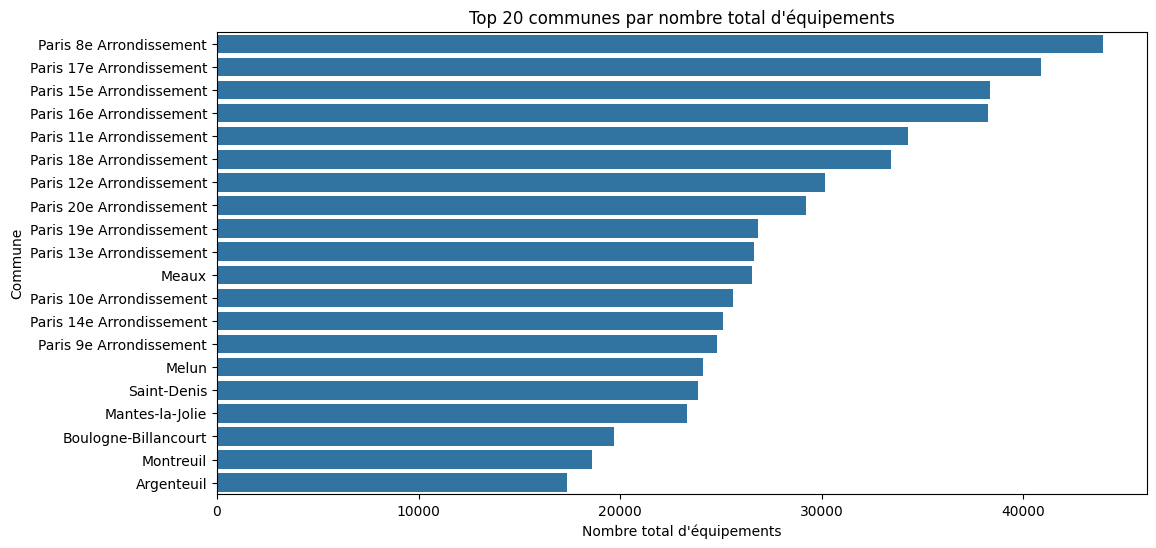

In [17]:
def plot_top_communes(df, top_n=20):
    """Top communes par nombre total d'équipements"""
    communes_count = df.groupby('nom_commune')['nombre_equipements'].sum().sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(12,6))
    sns.barplot(x=communes_count.values, y=communes_count.index)
    plt.title(f"Top {top_n} communes par nombre total d'équipements")
    plt.xlabel("Nombre total d'équipements")
    plt.ylabel("Commune")
    plt.show()
    
plot_top_communes(bpe_enriched)

## Répartition des sous domaines commerce par commune

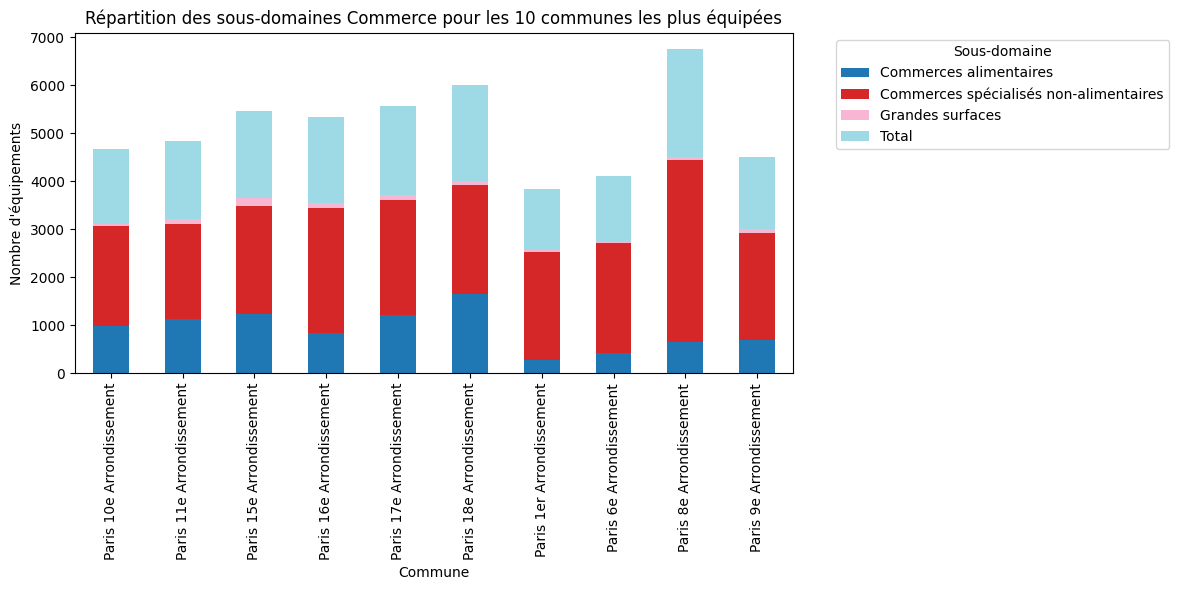

In [18]:
def plot_commerce_subdomains_by_commune(df, top_n_communes=10):
    """
    Répartition des sous-domaines de type 'Commerce' par commune.
    Affiche un barplot empilé pour les top N communes avec le plus d'équipements commerce.
    """
    # Filtrer les sous-domaines liés au commerce
    df_commerce = df[df['domaine_equipement_lib'].str.contains('Commerce', case=False, na=False)]
    
    # Top N communes par nombre total d'équipements commerce
    top_communes = df_commerce.groupby('nom_commune')['nombre_equipements'].sum().sort_values(ascending=False).head(top_n_communes).index
    df_top = df_commerce[df_commerce['nom_commune'].isin(top_communes)]
    
    # Pivot table pour le barplot empilé
    pivot = df_top.pivot_table(index='nom_commune', columns='sous_domaine_equipement_lib', 
                               values='nombre_equipements', aggfunc='sum', fill_value=0)
    
    # Graphique
    pivot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
    plt.title(f"Répartition des sous-domaines Commerce pour les {top_n_communes} communes les plus équipées")
    plt.xlabel("Commune")
    plt.ylabel("Nombre d'équipements")
    plt.legend(title="Sous-domaine", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Appel de la fonction
plot_commerce_subdomains_by_commune(bpe_enriched, top_n_communes=10)


## Liste des catégories d'équipements

In [19]:
# Vérification des colonnes disponibles
print("=== Colonnes disponibles ===")
print(list(bpe_enriched.columns))

# Nettoyage de la colonne
bpe_enriched['domaine_equipement_lib'] = bpe_enriched['domaine_equipement_lib'].astype(str).str.strip()

# Lister les types uniques
unique_types = sorted(bpe_enriched['domaine_equipement_lib'].dropna().unique())

print(f"=== {len(unique_types)} types d’équipements uniques trouvés ===\n")
for t in unique_types:
    print("-", t)


=== Colonnes disponibles ===
['code_commune', 'annee_donnees', 'domaine_equipement', 'sous_domaine_equipement', 'type_equipement', 'nombre_equipements', 'departement', 'nom_departement', 'nom_commune', 'domaine_equipement_lib', 'sous_domaine_equipement_lib', 'type_equipement_lib']
=== 8 types d’équipements uniques trouvés ===

- Commerces
- Enseignement
- Santé et action sociale
- Services pour les particuliers
- Sports, loisirs et culture
- Total
- Tourisme
- Transports et déplacements


## Supression de Totale qui rassemble déjà tout

In [20]:
bpe_clean = bpe_enriched[
    ~bpe_enriched['domaine_equipement_lib'].str.contains("Total", case=False, na=False)
    & ~bpe_enriched['sous_domaine_equipement_lib'].str.contains("Total", case=False, na=False)
    & ~bpe_enriched['type_equipement_lib'].str.contains("Total", case=False, na=False)
].copy()

In [21]:
# Vérification des colonnes disponibles
print("=== Colonnes disponibles ===")
print(list(bpe_clean.columns))

# Nettoyage de la colonne
bpe_clean['domaine_equipement_lib'] = bpe_clean['domaine_equipement_lib'].astype(str).str.strip()

# Lister les types uniques
unique_types = sorted(bpe_clean['domaine_equipement_lib'].dropna().unique())

print(f"=== {len(unique_types)} types d’équipements uniques trouvés ===\n")
for t in unique_types:
    print("-", t)

=== Colonnes disponibles ===
['code_commune', 'annee_donnees', 'domaine_equipement', 'sous_domaine_equipement', 'type_equipement', 'nombre_equipements', 'departement', 'nom_departement', 'nom_commune', 'domaine_equipement_lib', 'sous_domaine_equipement_lib', 'type_equipement_lib']
=== 7 types d’équipements uniques trouvés ===

- Commerces
- Enseignement
- Santé et action sociale
- Services pour les particuliers
- Sports, loisirs et culture
- Tourisme
- Transports et déplacements


## Sauvegarde du dataset


In [22]:
bpe_clean.to_csv("data/cleaned/bpe_nettoyes.csv", index=False, encoding='utf-8')
print(f"Fichier exporté : bpe_nettoyes.csv ({len(bpe_clean)} lignes)")

Fichier exporté : bpe_nettoyes.csv (71399 lignes)


## Synthèse du nettoyage
### Résumé des transformations effectuées

1. **Données brutes initiales : 2300480 lignes**
2. **Données finales:101349lignes**
3. **O doublons depuis le fichiers source**
4. **Rajout des données de l'INSEE pour voir les noms des communes**



### Recommandations pour l'analyse

<!-- COMPLÉTEZ ICI: Notez les points importants pour l'analyse suivante -->
<!-- - Variables les plus pertinentes identifiées -->
<!-- - Limitations des données -->
<!-- - Suggestions pour les widgets -->

---

**Notebook préparé par :**
- Ashley OHNONA
- Harisoa RANDRIANASOLO
- Fairouz YOUDARENE
- Jennifer ZAHORA

**Date :** 18 Octobre 2025

**Dataset final :** `donnees_nettoyees.csv`